# OPTION B (15 points total) - Primary for students with existing background in Machine Learning Application

Dataset : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


# Breast Cancer Diagnosis using Random Forest Classifier

## Introduction

This program aims to classify breast cancer tumors as malignant or benign using machine learning. We utilize the Breast Cancer Wisconsin (Diagnostic) dataset from the UCI Machine Learning Repository, which contains features computed from digitized images of fine needle aspirates (FNA) of breast masses.

## Methodology
We employ a Random Forest Classifier, an ensemble learning method that constructs multiple decision trees and outputs the class that is the mode of the classes of individual trees. The approach involves:


## Data Loading and Exploration

We start by importing necessary libraries and loading the breast cancer dataset from sklearn.

We create a pandas DataFrame for easier data handling and visualization.

We then print basic information about our dataset:
- Total number of samples
- Number of features
- Distribution of malignant and benign cases
  
Lastly, we create a bar chart to visually represent the distribution of diagnoses. This helps us quickly identify if there's a class imbalance in our dataset.



In [11]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


✦ Dataset Summary ✦
Total samples: 569
Number of features: 30
Class distribution:
Diagnosis
1    357
0    212
Name: count, dtype: int64



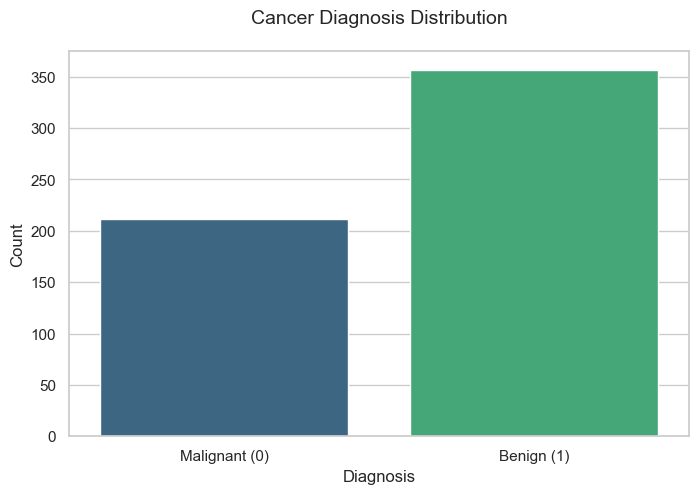

In [12]:
# Load breast cancer dataset from sklearn
cancer_data = datasets.load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# Create DataFrame for better data visualization
df = pd.DataFrame(X, columns=cancer_data.feature_names)
df['Diagnosis'] = y  # 0 = Malignant, 1 = Benign

# Display basic dataset info
print("✦ Dataset Summary ✦")
print(f"Total samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Class distribution:\n{df['Diagnosis'].value_counts()}\n")

# Visualize class distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Diagnosis', data=df, palette='viridis')
plt.title('Cancer Diagnosis Distribution', fontsize=14, pad=20)
plt.xticks([0,1], ['Malignant (0)', 'Benign (1)'])
plt.ylabel('Count')
plt.show()

## Data Preprocessing

In this section, we prepare our data for the machine learning model.
First, we split our data into training (80%) and test (20%) sets. This allows us to evaluate our model on unseen data later.

Next, we scale our features using StandardScaler. This ensures all features are on a similar scale, which is important for many machine learning algorithms.

We apply the scaler to both training and test data, making sure to fit it only on the training data to prevent data leakage.

Finally, we print the shapes of our scaled datasets to confirm everything is in order.


In [13]:
# Split data into training (80%) and test sets (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Maintain class distribution
)

# Standardize features using Z-score normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Data scaled successfully")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

✓ Data scaled successfully
Training set shape: (455, 30)
Test set shape: (114, 30)


## Hyperparameter Tuning

Here, we use GridSearchCV to find the best hyperparameters for our Random Forest model.

We define a grid of parameters to search through, including number of trees, maximum depth, and minimum samples to split a node.

We set up 5-fold cross-validation to robustly evaluate each parameter combination.

After running the grid search, we print out the best parameters found and their corresponding accuracy score.


In [14]:
# Hyperparameter Tuning with GridSearchCV
# Define parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Set up 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest and GridSearch
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Perform grid search on training data
print("🔍 Starting grid search...")
grid_search.fit(X_train_scaled, y_train)

# Display best parameters
print("\n★ Best Parameters Found:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")


🔍 Starting grid search...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

★ Best Parameters Found:
max_depth: 10
max_features: sqrt
min_samples_split: 2
n_estimators: 200
Best CV Accuracy: 0.9582


# Final Model Evaluation

we evaluate our best model's performance on the test set.

We use the model to make predictions on the test data and then calculate several performance metrics:
- Accuracy score
- Detailed classification report
- Confusion matrix

We visualize the confusion matrix as a heatmap for easy interpretation of the model's predictions.


📊 Final Test Set Performance
-----------------------------
Accuracy: 0.9561

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.95      0.93      0.94        42
      Benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



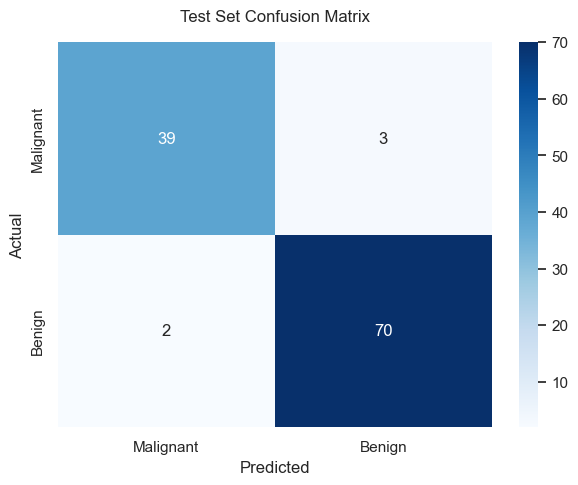

In [15]:
# Final Model Evaluation on Test Set
# Get best model from grid search
best_rf = grid_search.best_estimator_

# Predict on test set
test_preds = best_rf.predict(X_test_scaled)

# Generate performance report
print("📊 Final Test Set Performance")
print("-----------------------------")
print(f"Accuracy: {accuracy_score(y_test, test_preds):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, test_preds, target_names=['Malignant', 'Benign']))

# Confusion matrix visualization
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, test_preds), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title('Test Set Confusion Matrix', pad=15)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## Interpretation of Final Test Set Performance
The Random Forest classifier performed very well on the test set, achieving an overall accuracy of 95.61%. This means that nearly 96 out of every 100 predictions made by the model were correct.

Key Metrics:
- Accuracy: The model achieved an accuracy of 95.61%, meaning it correctly predicted approximately 96 out of 100 cases.
- Precision:
  - Malignant: Of all the tumors predicted as malignant,95% were actually malignant.
  - Benign: Of all the tumors predicted as benign, 96% were truly benign.
- Recall:
  - Malignant: The model identified 93% of actual malignant cases.
  - Benign: The model identified 97% of actual benign cases.
- F1-Score:
  - Malignant: A balanced score of 94%, combining precision and recall.
  - Benign: An excellent score of 97%, reflecting strong performance.

### Confusion Matirx

- True Positives (Malignant correctly classified)  
   The model correctly identified 39 malignant cases as malignant.

- False Negatives (Malignant misclassified as Benign):  
   3 malignant cases were incorrectly classified as benign.

- True Negatives (Benign correctly classified):  
   The model correctly identified 70 benign cases as benign.

- False Positives (Benign misclassified as Malignant):  
   2 benign cases were incorrectly classified as malignant.



### Conclusion:
The Random Forest classifier demonstrates high accuracy and balanced performance across both classes. With only 5 misclassifications out of 114 predictions, it shows strong reliability in distinguishing between malignant and benign tumors. This makes it a valuable tool for assisting in breast cancer diagnosis.


## Feature Importance Analysis

Analyzing and visualizing the importance of different features in the Random Forest model.


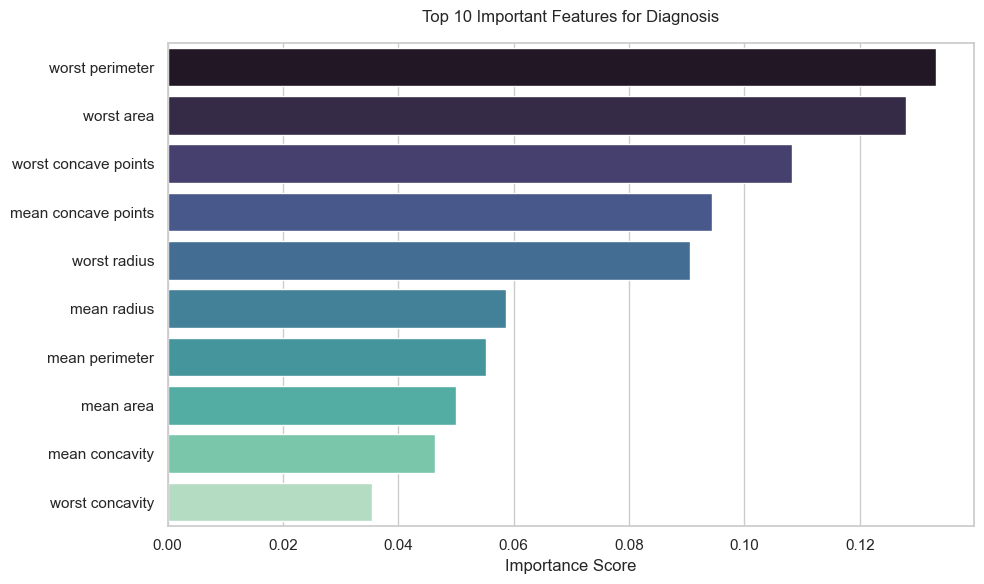

In [16]:
# Cell 6: Feature Importance Analysis
# Extract and sort feature importances
importances = best_rf.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': cancer_data.feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Visualize top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='mako')
plt.title('Top 10 Important Features for Diagnosis', pad=15)
plt.xlabel('Importance Score')
plt.ylabel('')
plt.tight_layout()
plt.show()


I wanted analysis the top 10 most important features used by the Random Forest classifier for breast cancer diagnosis. Features such as worst perimeter, worst area, and worst concave points have the highest importance scores, indicating that they play a significant role in distinguishing between malignant and benign tumors. Other key features include mean concave points, worst radius, and mean radius, which also contribute substantially to the model's decision-making process. These insights provide valuable information about the characteristics of cell nuclei that are most indicative of cancer.